In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,unitech uniworld resorts,sector 33,8.00,17778.0,4500.0,Built Up area: 500 (418.06 sq.m.),6,5,3+,4.0,NaN,Undefined,NaN,500.0,NaN,0,0,0,0,0,0,0,750.000000
1,house,ss hibiscus,sector 50,12.50,40850.0,3060.0,Plot area 470(392.98 sq.m.)Built Up area: 410 ...,4,4,3+,2.0,West,Relatively New,NaN,410.0,340.0,1,1,0,0,0,2,160,765.000000
2,flat,krrish florence estate,sector 70,1.25,6702.0,1865.0,Super Built up area 1865(173.26 sq.m.),3,3,3,18.0,North-East,Under Construction,1865.0,NaN,NaN,0,0,0,0,0,0,51,621.666667
3,flat,signature global park 4,sector 36,0.72,6429.0,1120.0,Carpet area: 1120 (104.05 sq.m.),3,2,3,2.0,NaN,Under Construction,NaN,NaN,1120.0,0,0,0,0,0,0,0,373.333333
4,flat,signature global solera,sector 107,0.30,6135.0,489.0,Super Built up area 602(55.93 sq.m.)Carpet are...,2,2,1,5.0,East,Relatively New,602.0,NaN,489.0,0,0,0,0,0,0,57,244.500000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1683
built_up_area          1970
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

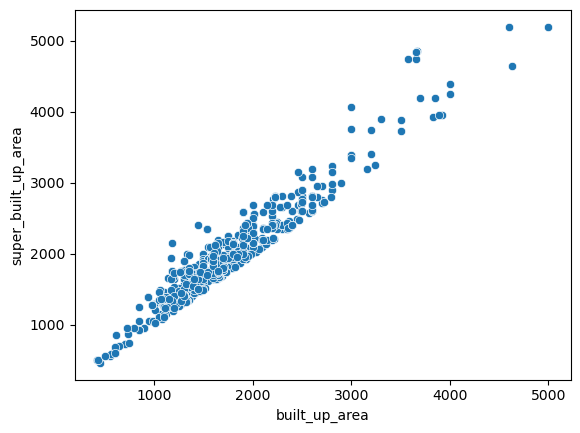

In [7]:
sns.scatterplot(x="built_up_area", y="super_built_up_area", data=df)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

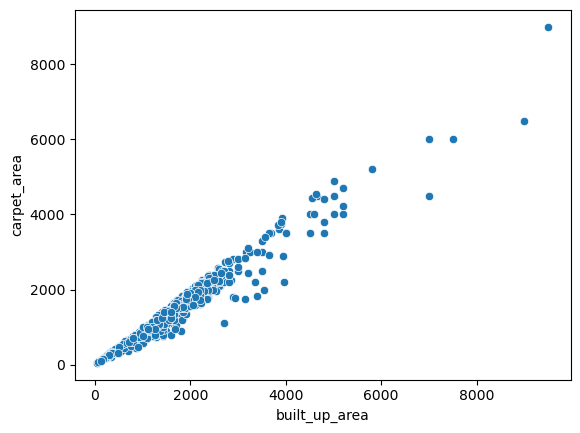

In [8]:
sns.scatterplot(x='built_up_area',y='carpet_area',data=df)

In [9]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [10]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [11]:
all_present_df.shape

(531, 24)

In [12]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [13]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [14]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [15]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,signature global solera,sector 107,0.30,6135.0,489.0,Super Built up area 602(55.93 sq.m.)Carpet are...,2,2,1,5.0,East,Relatively New,602.0,NaN,489.00,0,0,0,0,0,0,57,244.500000
9,flat,m3m woodshire,sector 107,1.30,10815.0,1202.0,Super Built up area 1943(180.51 sq.m.)Carpet a...,3,3,3,7.0,NaN,Relatively New,1943.0,NaN,1202.00,0,0,0,1,0,0,89,400.666667
16,flat,umang winter hills,sector 77,1.10,5296.0,2077.0,Super Built up area 2077(192.96 sq.m.)Carpet a...,3,4,3+,9.0,North,Relatively New,2077.0,NaN,1600.00,0,1,0,0,0,0,49,692.333333
20,flat,vatika city homes,sector 83,1.08,6207.0,1740.0,Super Built up area 1740(161.65 sq.m.)Carpet a...,3,3,3,6.0,South-West,Relatively New,1740.0,NaN,1350.00,0,0,1,0,0,0,111,580.000000
27,flat,emaar imperial gardens,sector 102,1.91,9550.0,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet a...,3,4,2,17.0,East,Relatively New,2000.0,NaN,1228.17,1,1,0,0,0,1,152,666.666667


In [17]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21100\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21100\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [18]:
df.update(sbc_df)

In [19]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1683
built_up_area          1550
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [20]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [21]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,krrish florence estate,sector 70,1.25,6702.0,1865.0,Super Built up area 1865(173.26 sq.m.),3,3,3,18.0,North-East,Under Construction,1865.0,NaN,NaN,0,0,0,0,0,0,51,621.666667
5,flat,unitech south park,sector 70,1.13,7001.0,1614.0,Super Built up area 1610(149.57 sq.m.),3,3,2,1.0,NaN,Under Construction,1610.0,NaN,NaN,0,0,0,0,0,0,46,538.000000
12,flat,tulip violet,sector 69,1.30,8286.0,1569.0,Super Built up area 1568(145.67 sq.m.),3,3,1,12.0,South-West,Relatively New,1568.0,NaN,NaN,0,0,0,1,0,0,86,523.000000
21,flat,pareena coban residences,sector 99a,1.35,6760.0,1997.0,Super Built up area 1997(185.53 sq.m.),3,5,3,6.0,NaN,New Property,1997.0,NaN,NaN,0,1,0,0,1,0,60,665.666667
34,flat,ild greens,sector 37c,1.00,4724.0,2117.0,Super Built up area 1800(167.23 sq.m.),3,3,3,3.0,NaN,Under Construction,1800.0,NaN,NaN,0,0,0,0,0,0,51,705.666667


In [22]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21100\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21100\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(rou

In [23]:
df.update(sb_df)

In [24]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1683
built_up_area           677
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [25]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,signature global park 4,sector 36,0.72,6429.0,1120.0,Carpet area: 1120 (104.05 sq.m.),3,2,3,2.0,NaN,Under Construction,NaN,NaN,1120.0,0,0,0,0,0,0,0,373.333333
7,flat,oriental valley chs,sector 9a,1.50,9091.0,1650.0,Carpet area: 1650 (153.29 sq.m.),4,3,3+,8.0,NaN,Relatively New,NaN,NaN,1650.0,0,0,0,0,0,1,8,412.500000
10,flat,smart world orchard,sector 61,2.20,14203.0,1549.0,Carpet area: 1549 (143.91 sq.m.),3,3,2,4.0,North,New Property,NaN,NaN,1549.0,0,0,0,0,0,0,152,516.333333
11,flat,pooja apartment,sector 3 phase 3 extension,0.25,3571.0,700.0,Carpet area: 700 (65.03 sq.m.),2,2,2,2.0,East,Relatively New,NaN,NaN,700.0,0,0,0,0,0,0,0,350.000000
15,flat,malibu towers,sector 47,2.45,10699.0,2290.0,Carpet area: 2290 (212.75 sq.m.),3,4,2,1.0,NaN,Old Property,NaN,NaN,2290.0,1,0,0,0,0,1,42,763.333333


In [27]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21100\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21100\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carp

In [28]:
df.update(c_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1683
built_up_area             0
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

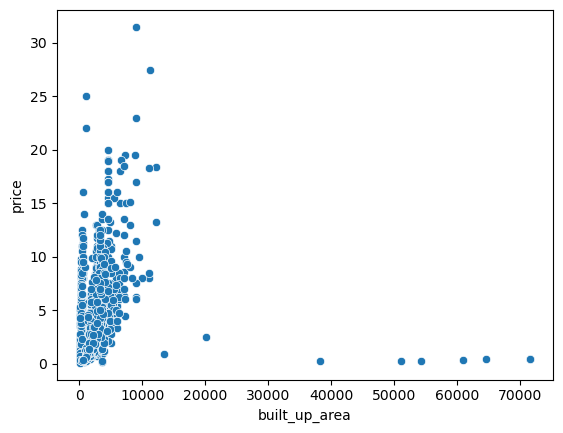

In [31]:
sns.scatterplot(x='built_up_area',y='price',data=df)

In [32]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [33]:
anamoly_df.sample(5)

,price,area,built_up_area
1103,2.80,1650.0,1800.0
2040,6.30,1800.0,1800.0
1332,16.00,4235.0,500.0
1380,2.80,2048.0,1853.0
2726,7.35,1760.0,240.0


In [34]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [35]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

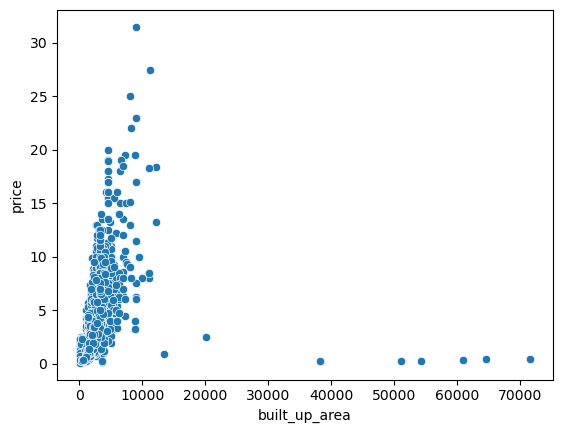

In [38]:
sns.scatterplot(x='built_up_area',y='price',data=df)

In [39]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [40]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,unitech uniworld resorts,sector 33,8.00,17778.0,6,5,3+,4.0,NaN,Undefined,4500.0,0,0,0,0,0,0,0
1,house,ss hibiscus,sector 50,12.50,40850.0,4,4,3+,2.0,West,Relatively New,3060.0,1,1,0,0,0,2,160
2,flat,krrish florence estate,sector 70,1.25,6702.0,3,3,3,18.0,North-East,Under Construction,1688.0,0,0,0,0,0,0,51
3,flat,signature global park 4,sector 36,0.72,6429.0,3,2,3,2.0,NaN,Under Construction,1244.0,0,0,0,0,0,0,0
4,flat,signature global solera,sector 107,0.30,6135.0,2,2,1,5.0,East,Relatively New,544.0,0,0,0,0,0,0,57


In [41]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [42]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
28,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
331,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0
733,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
803,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0
1327,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
1338,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
1392,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1414,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
2288,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,0,59
2396,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0


In [43]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [44]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21100\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [45]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [46]:
1011/df.shape[0]

0.2843881856540084

### facing

<Axes: ylabel='count'>

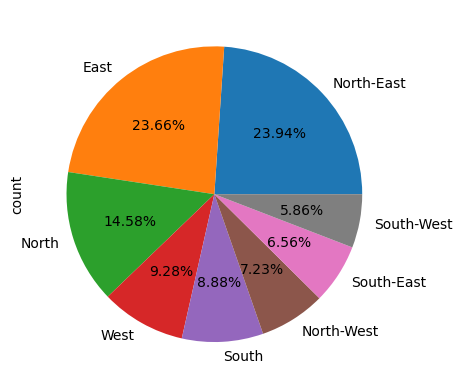

In [47]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [48]:
df.drop(columns=['facing'],inplace=True)

In [49]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1859,flat,orris carnation residency,sector 85,0.55,5789.0,2,2,2,5.0,Relatively New,1050.0,0,0,0,0,1,0,174
32,house,international city by sobha phase 1,sector 109,6.00,24691.0,4,5,3+,2.0,Relatively New,2430.0,0,1,0,0,0,1,96
456,house,housing board colony,sector 28,2.10,23333.0,2,8,3+,4.0,Moderately Old,900.0,0,0,0,0,1,1,38
1191,house,unitech nirvana birch court,sector 50,6.80,31481.0,4,4,3+,2.0,Old Property,2160.0,1,1,0,1,0,0,105
2125,house,independent,sector 5,3.50,14787.0,5,4,2,2.0,Old Property,2367.0,0,0,0,1,1,0,36


In [50]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [54]:
df.drop(index=[1338],inplace=True)

In [53]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1338,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [55]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [56]:
df['agePossession'].value_counts()

agePossession
Relatively New        1608
New Property           557
Moderately Old         542
Old Property           293
Undefined              290
Under Construction     263
Name: count, dtype: int64

In [57]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,unitech uniworld resorts,sector 33,8.00,17778.0,6,5,3+,4.0,Undefined,4500.0,0,0,0,0,0,0,0
18,flat,chd avenue,sector 71,0.95,7917.0,2,2,0,5.0,Undefined,1200.0,0,0,0,0,0,0,0
29,flat,signature global park,sohna road,0.55,6691.0,2,2,3,3.0,Undefined,913.0,0,0,0,0,0,0,58
111,flat,mrg skyline,sector 106,1.82,13392.0,3,2,2,4.0,Undefined,1359.0,0,0,0,0,0,0,0
115,flat,railway officers rpf society,sector 9a,1.30,5039.0,4,4,3+,9.0,Undefined,2580.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,flat,dlf icon,sector 43,5.80,20707.0,4,4,3+,18.0,Undefined,2801.0,0,0,0,0,0,0,0
3522,house,independent,sector 3,0.90,8929.0,3,1,0,1.0,Undefined,1008.0,0,0,0,0,0,0,0
3535,flat,signature global park,sohna road,0.75,6938.0,2,2,0,1.0,Undefined,1081.0,0,0,0,0,0,0,58
3547,flat,supertech new soft launch,sector 68,0.84,7119.0,2,2,2,7.0,Undefined,1180.0,0,0,0,0,0,0,0


In [58]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [59]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [61]:
df['agePossession'].value_counts()

agePossession
Relatively New        1731
New Property           586
Moderately Old         579
Old Property           327
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [62]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [63]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [64]:
df['agePossession'].value_counts()

agePossession
Relatively New        1740
New Property           587
Moderately Old         586
Old Property           330
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [65]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [66]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [67]:
df['agePossession'].value_counts()

agePossession
Relatively New        1742
Moderately Old         617
New Property           587
Old Property           330
Under Construction     277
Name: count, dtype: int64

In [68]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [69]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [70]:
df.shape

(3553, 18)